## Import data into data frame

In [420]:
import pandas as pd
%matplotlib inline
#what does this do?

colnames=['name', 'gender', 'count']
years = range(1880, 2016, 1)
data = []

for y in years:
 fn = f'yob{y}.txt'
 df = pd.read_csv(fn, names=colnames,header = None)
 df['year'] = y
 data.append(df)

df = pd.concat(data,ignore_index=True)
df.head(10)
#df.shape

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [421]:
dfs = df.stack()
dfs.head(5)

0  name      Mary
   gender       F
   count     7065
   year      1880
1  name      Anna
dtype: object

## count of each name

In [422]:
df['name'].value_counts()

Leslie         272
Robert         272
Jesse          272
Sidney         272
Francis        272
Jean           272
William        272
Jessie         272
Lee            272
John           272
Ollie          272
James          272
Tommie         272
Marion         272
Joseph         272
Johnnie        272
June           271
Henry          271
Charlie        271
Charles        271
Elizabeth      271
Thomas         270
Ira            270
Anna           269
Cleo           269
Lonnie         269
Ivy            269
George         268
Sammie         268
Dana           268
              ... 
Chantis          1
Karismah         1
Juanenrique      1
Comesha          1
Shakelah         1
Montonio         1
Dmir             1
Tristano         1
Akhilles         1
Kyndyl           1
Yerenia          1
Shoniece         1
Gayola           1
Dontevius        1
Mihit            1
Tenicha          1
Mishall          1
Teonni           1
Agamveer         1
Loyse            1
Tadyn            1
Tayeshawn   

## popularity of a name over time

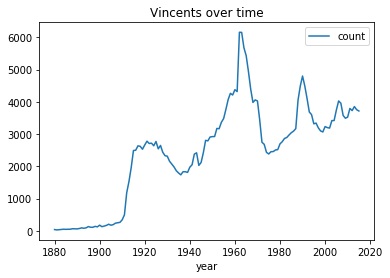

In [436]:
dfvi = df[(df["name"] == "Vincent") & (df["gender"] == "M")]
dfvi
dfvi.plot(x="year", title="Vincents over time")

In [ ]:
dfvi["count"].max()

## Identify and print all lines containing your name in the year 2000.

In [425]:
df[(df["name"] == "Vincent") & (df["gender"] == "M") & (df["year"] == 2000)]

,name,gender,count,year
1350512,Vincent,M,3233,2000


In [ ]:
c = df[(df["name"] == "Vincent") & (df["gender"] == "M") & (df["year"] == 2000)]["count"]
c

## Create a bar plot showing 5 selected names for the year 2000.
--> empty values are automatically ommitted

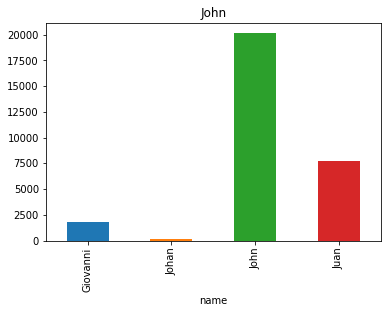

In [426]:
dffn = df[((df['name'] == "Juan") | (df['name'] == "John") | (df['name'] == "Giovanni") | (df['name'] == "Johan") | (df['name'] == "João") ) & (df['year'] == 2000)]
dffnn = dffn.groupby('name')['count'].sum()
dffnn.plot.bar(title = "John")

## create a plot that shows the total birth rate in the U.S. over time

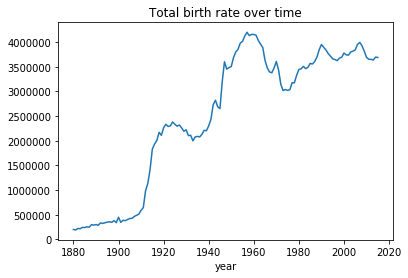

In [427]:
dftb = df.groupby('year')['count'].sum()
dftb.plot(title = "Total birth rate over time")

## make new dataframe with additional column that includes the count shifted by one year
### see development over time / compare two years

In [428]:
cint = int(c)

cmoint = int(cmo)
for y in years:
    c = df[(df["name"] == "Vincent") & (df["gender"] == "M") & (df["year"] == y)]["count"]
    cmo = df[(df["name"] == "Vincent") & (df["gender"] == "M") & (df["year"] == y - 1)]["count"]                                                        
    if cint > cmoint:
        print(y)

TypeError: cannot convert the series to <class 'int'>

In [ ]:
cmoint = int(cmo)
cmoint

In [430]:
df['countnew'] = df['']

KeyError: ''

## fraction of male Vincents of all children born in 2000

In [431]:
vinc2k = df[(df["name"] == "Vincent") & (df["gender"] == "M") & (df["year"] == 2000)]["count"]
kids2k = (df[df["year"] == 2000]['count'].sum())
percv = (vinc2k / kids2k) * 100
percv

1350512    0.085573
Name: count, dtype: float64

## show 50 most popular occurences of names that start with "Vinc"

In [432]:
df5 = df[(df['name'].str.startswith("Vinc")) & (df['gender'] == 'M') & (df['year'] == 2000)][:50]
df5

,name,gender,count,year
1350512,Vincent,M,3233,2000
1351389,Vincenzo,M,149,2000
1351820,Vince,M,87,2000
1352149,Vincente,M,64,2000


In [ ]:
dfs = df.stack(0)
dfs.head(5)

In [ ]:
dfus = dfs.unstack(0, 2)

In [412]:
df['name'].unique()

array(['Mary', 'Anna', 'Emma', ..., 'Zimo', 'Zyahir', 'Zylyn'],
      dtype=object)

## show count of names over years | groupby

In [413]:
dfy = df.groupby('name')[['count']].sum()
dfmax = dfy.max()
dfmax

count    5159519
dtype: int64

## count sum of girls and boys in the whole data set

In [317]:
dfgb = df.groupby('gender')['count'].sum()
dfgb

gender
F    17076644
M    17385262
Name: count, dtype: int64

## Plot both sums in a bar plot

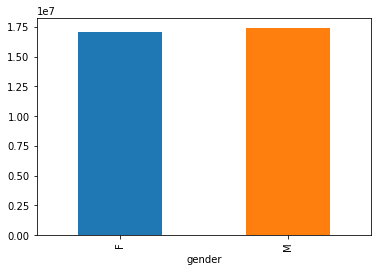

In [414]:
dfgb.plot.bar();

## check for occurrence of name "Alex"

In [415]:
ds['name'] == 'Alex'

187552    False
187553    False
187554    False
187555    False
187556    False
187557    False
187558    False
187559    False
187560    False
187561    False
Name: name, dtype: bool

## Count how many names occur at least 1000 times in the file yob2000.txt

In [416]:
dfth = df[(df['year'] == 2000) & (df['count'] > 1000)].count()
dfth

name      617
gender    617
count     617
year      617
dtype: int64

## Create a new column containing the percentage of a name on the total births of a given year.

In [417]:
df2k = df[df['year'] == 2000]
df2k['percentage'] = df2k['count'] * 100 / df2k['count'].sum()
df2k.head(5)
#df['A_perc'] = df['A']/df['sum']

C:\Users\vince\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,name,gender,count,year,percentage
1332740,Emily,F,25953,2000,0.686936
1332741,Hannah,F,23080,2000,0.610892
1332742,Madison,F,19967,2000,0.528496
1332743,Ashley,F,17997,2000,0.476353
1332744,Sarah,F,17697,2000,0.468413


In [154]:
df.nlargest(10, 'count')

,name,gender,count,year
48670,James,M,86239,1950
60192,David,M,85928,1960
74132,Michael,M,85303,1970
60193,Michael,M,84183,1960
48671,Robert,M,83565,1950
42559,Linda,F,80432,1950
48672,John,M,79420,1950
60194,James,M,76842,1960
60195,John,M,76096,1960
60196,Robert,M,72369,1960


In [225]:
df['year'].value_counts()

2010    34067
2000    29769
1990    24719
1980    19445
1970    14780
1960    11921
1920    10755
1950    10302
1930     9789
1940     8961
1910     4629
1900     3730
1890     2695
1880     2000
Name: year, dtype: int64

## count of unique names (really?)

In [165]:
df['name'].nunique()

55518

## length of dataframe

In [166]:
len(df)

187562

In [109]:
df.groupby(by=["name", "year"]).mean()

count
name      year       
Aaban     2007    5.0
          2009    6.0
          2010    9.0
          2011   11.0
          2012   11.0
          2013   14.0
          2014   16.0
          2015   15.0
          2016    9.0
Aabha     2011    7.0
          2012    5.0
          2014    9.0
          2015    7.0
          2016    7.0
Aabid     2003    5.0
          2016    5.0
Aabir     2016    5.0
Aabriella 2008    5.0
          2014    5.0
          2015    5.0
          2016   11.0
Aada      2015    5.0
Aadam     1987    5.0
          1988    5.0
          1993    7.0
          1994    6.0
          1995    6.0
          1996    5.0
          1997    5.0
          1998    8.0
...               ...
Zyshawn   2012   10.0
          2013   13.0
          2014    6.0
Zyshon    1998    8.0
          2001    6.0
          2005    5.0
Zyshonne  1998   26.0
          1999   30.0
          2000   17.0
          2001   12.0
          2002    9.0
          2003    7.0
Zytaevius 2012    5.0
Zytaveon  2011    8.0
          2014    8.0
Zytavion  2011    5.0
Zytavious 2002    6.0
          2004    6.0
          2005    5.0
          2006    7.0
          2007    6.0
          2009    7.0
          2010    6.0
Zyus      2015    5.0
Zyva      2016    8.0
Zyvion    2009    5.0
Zyvon     2015    7.0
Zyyanna   2010    6.0
Zyyon     2014    6.0
Zzyzx     2010    5.0

[1726374 rows x 1 columns]

In [167]:
df[['gender', 'name']]

,gender,name
0,F,Mary
1,F,Anna
2,F,Emma
3,F,Elizabeth
4,F,Minnie
5,F,Margaret
6,F,Ida
7,F,Alice
8,F,Bertha
9,F,Sarah


In [126]:
df.max(axis=None, skipna=None, level=None, numeric_only=None)

name      Zyshonne
gender           M
count        85303
year          2000
dtype: object

## select datasets of years with the three highest occurrences of "Vincent"

In [418]:
df[df['name'] == "Vincent"].nlargest(3, 'count')

,name,gender,count,year
604212,Vincent,M,6157,1962
616493,Vincent,M,6152,1963
628918,Vincent,M,5676,1964


In [293]:
countAlex = df[df['name'] == "Abbey"]
CountName = countAlex.count()
CountName

name      8
gender    8
count     8
year      8
dtype: int64

## count data sets with names that start with "A"

In [123]:
df[df['name'].str.startswith('A')].count()

name      5728
gender    5728
count     5728
year      5728
dtype: int64

## find the maximum in "count"

In [403]:
df[['count']].max()

count    86239
dtype: int64

## total births per year

In [150]:
dfgroup = df.groupby('year')[['count']].sum()
dfgroup

,count
year,
1880,201484
1890,301401
1900,450283
1910,590715
1920,2262681
1930,2223159
1940,2302378
1950,3503700
1960,4154377


## plot total of births per year

In [419]:
dfgroup.plot()

NameError: name 'dfgroup' is not defined

## plot occurrences over time

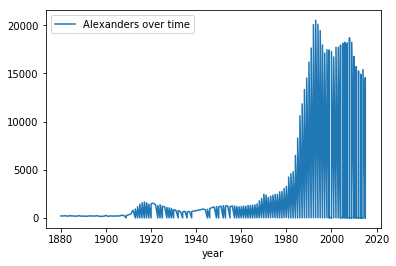

In [439]:
dfalex = df[(df['name'].str.startswith("Alexander"))& (df['gender'] == 'M') ]
dfalex.plot(x = 'year', y = 'count', label = "Alexanders over time")
#df5 = df[(df['name'].str.startswith("Vinc")) & (df['gender'] == 'M') & (df['year'] == 2000)][:50]

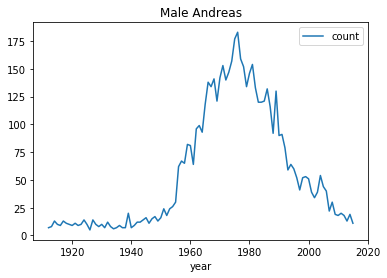

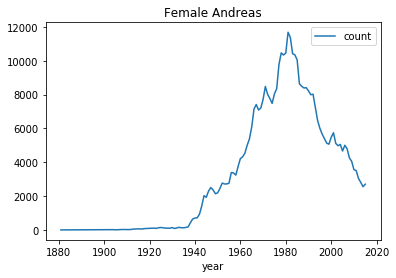

In [437]:
df[(df['name'] == "Andrea") & (df['gender'] == 'M')].plot(x = 'year', title = "Male Andreas")
df[(df['name'] == "Andrea") & (df['gender'] == 'F')].plot(x = 'year', title = "Female Andreas")

In [234]:
df.head(3)

,name,gender,count,year,percentage
0,Mary,F,7065,1880,NaN
1,Anna,F,2604,1880,NaN
2,Emma,F,2003,1880,NaN


In [ ]:
df[(df['name'] == "Andrea") & (df['gender'] == 'M')].plot(x = 'year')

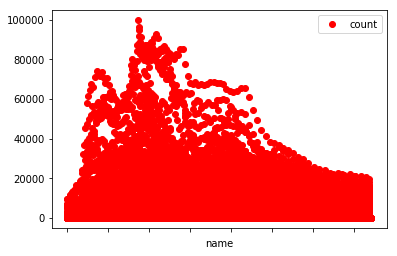

In [435]:
df.plot('name', 'count', style='ro')

In [411]:
for y in years:
    if((df[(df["name"] == "Harry") & (df["gender"] == "M") & (df["year"] == y)]["count"]) == (df[(df["name"] == "Harry") & (df["gender"] == "M") & (df["year"] == y)]["count"])):
        print("Yess")
    else:
        print("no")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().